In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

import os
import sys
sys.path.append("../")

from utils.data import binary_LDS
from IBP_VI import IndianBuffetProcessInfiniteVI

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
X, weights = binary_LDS(num_samples=100, noise_scale=0.2, binary_prob=0.5)

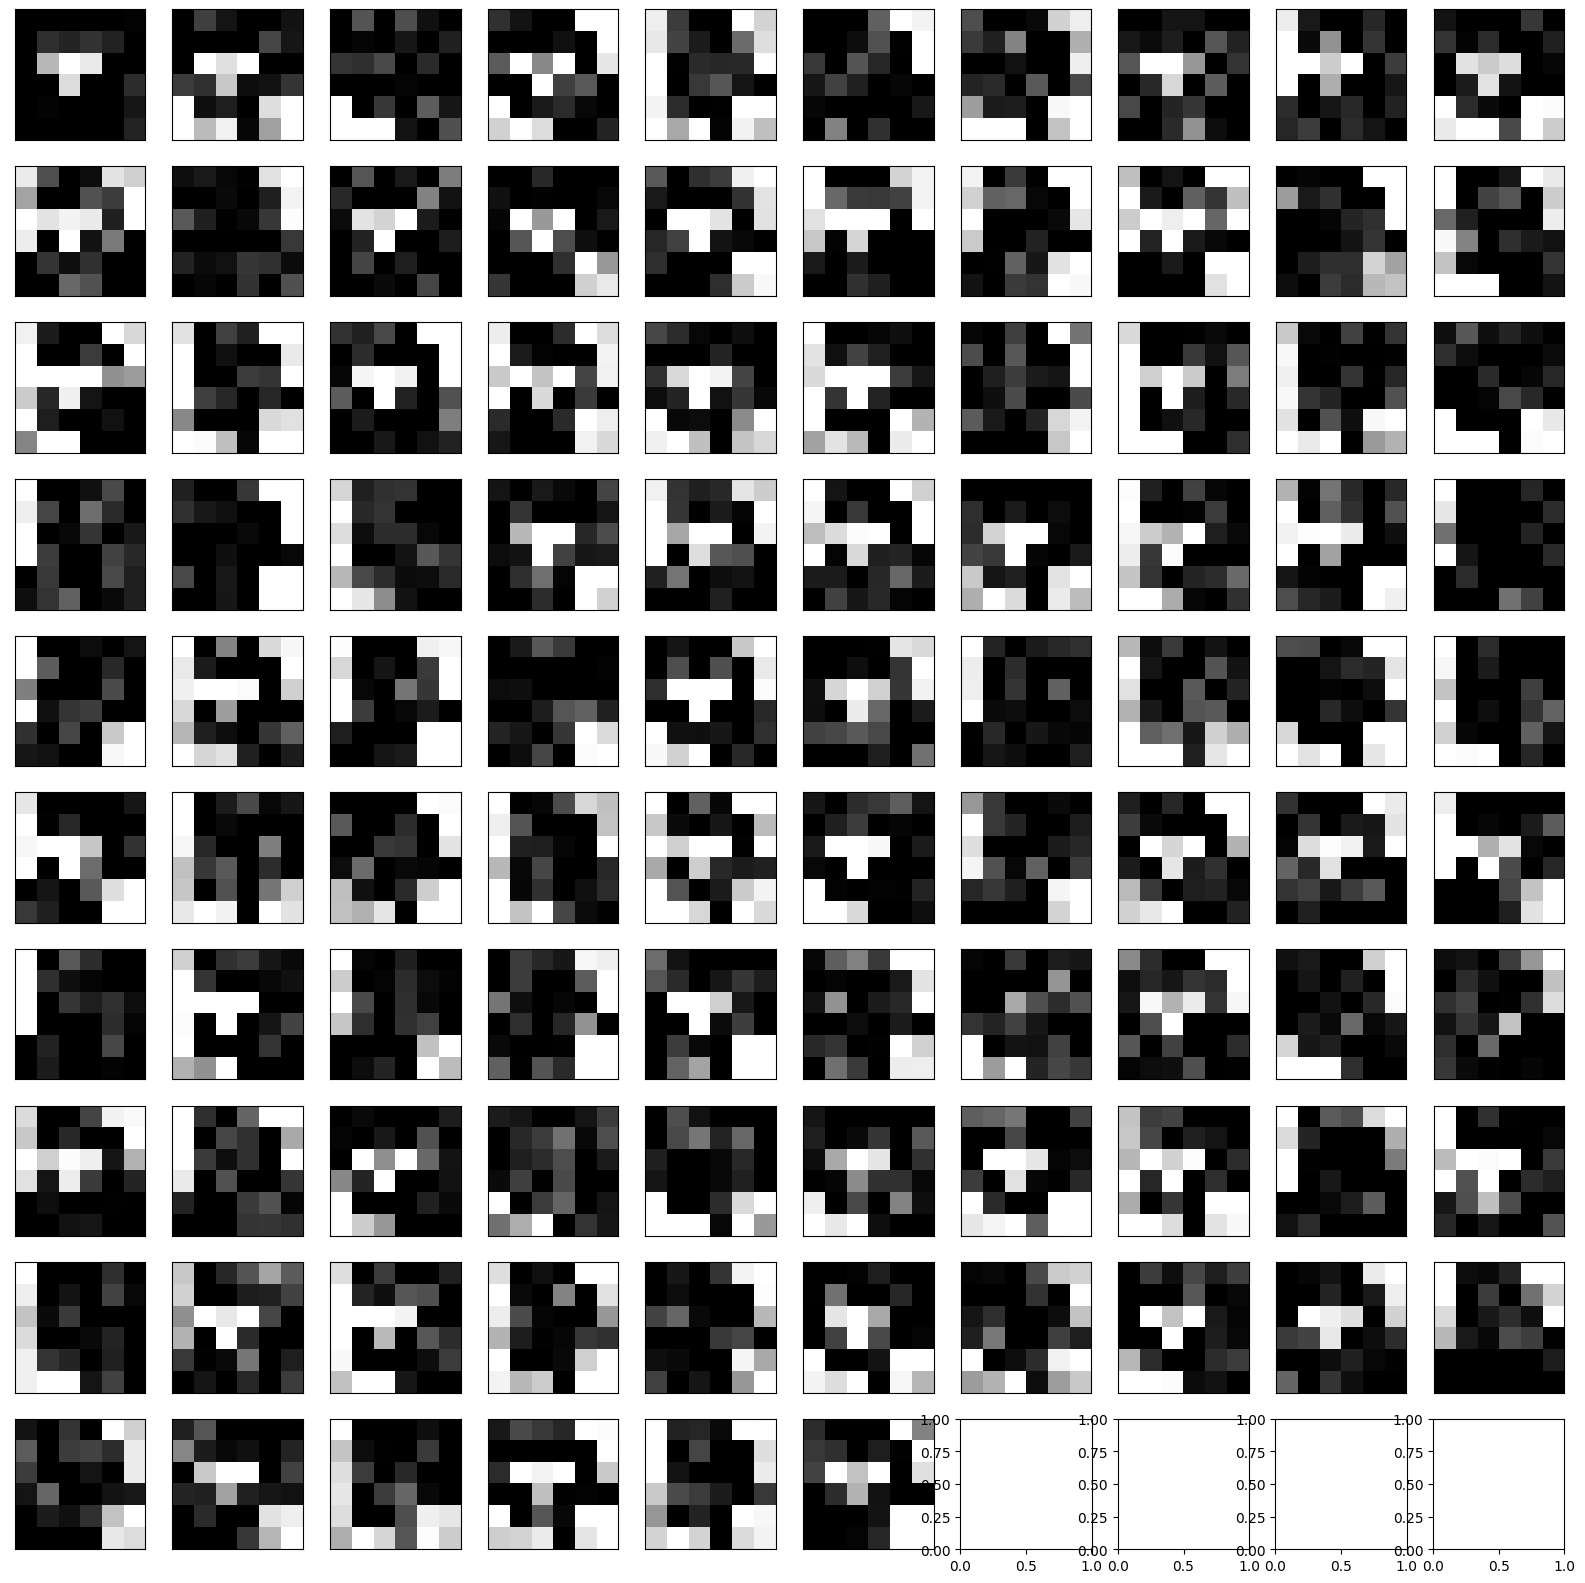

In [3]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(len(X)):
    ax[i // 10, i % 10].imshow(X[i].reshape(6, 6), cmap="gray", vmin=0.0, vmax=1.0)
    ax[i // 10, i % 10].set_xticks([])
    ax[i // 10, i % 10].set_yticks([])

In [35]:
K = 10
alpha = 1.5
sigmasq_A = 0.05
sigmasq_n = 0.05

IBP_VI_infinite = IndianBuffetProcessInfiniteVI(
    X=X, 
    K=K, 
    alpha=alpha, 
    sigmasq_A=sigmasq_A, 
    sigmasq_n=sigmasq_n, 
    verbose=False, 
    threshold=1e-10, 
    max_iter=1000, 
)

In [36]:
free_energy_history, converge = IBP_VI_infinite.fit()

free_energy=-48025.19: 100%|██████████| 1000/1000 [01:15<00:00, 13.20it/s]


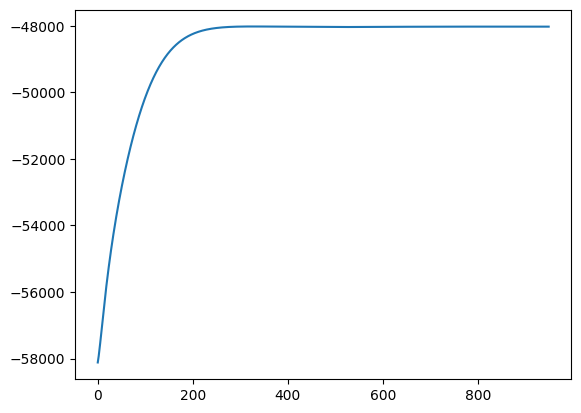

In [42]:
plt.plot(free_energy_history[50:])

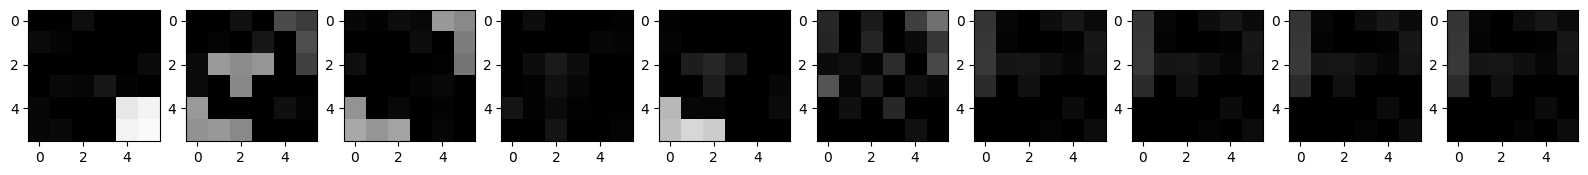

In [39]:
fig, ax = plt.subplots(1, K, figsize=(20, 3))
for i in range(K):
    ax[i].imshow(IBP_VI_infinite.m[i].reshape(6, 6), cmap="gray", vmin=0, vmax=1)